In [111]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,56,Feminino,20,1,Sim,Sudeste,11860.538380
1,69,Masculino,42,1,Sim,Centro-Oeste,15319.874793
2,46,Masculino,30,1,Sim,Nordeste,8441.171330
3,32,Masculino,20,3,Sim,Nordeste,6006.769689
4,60,Feminino,28,1,Não,Centro-Oeste,6445.800156


Corrigindo Colunas Categoricas como Label Encoder

In [112]:
from sklearn.preprocessing import LabelEncoder

# Inicializando LabelEncoder
le = LabelEncoder()

# Aplicando LabelEncoder em variáveis categóricas
df['gênero'] = le.fit_transform(df['gênero'])
df['fumante'] = le.fit_transform(df['fumante'])
df['região'] = le.fit_transform(df['região'])


df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,56,0,20,1,1,3,11860.538380
1,69,1,42,1,1,0,15319.874793
2,46,1,30,1,1,1,8441.171330
3,32,1,20,3,1,1,6006.769689
4,60,0,28,1,0,0,6445.800156


Histograma para verificar a dispersao dos dados

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'gênero'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'fumante'}>,
        <Axes: title={'center': 'região'}>],
       [<Axes: title={'center': 'encargos'}>, <Axes: >, <Axes: >]],
      dtype=object)

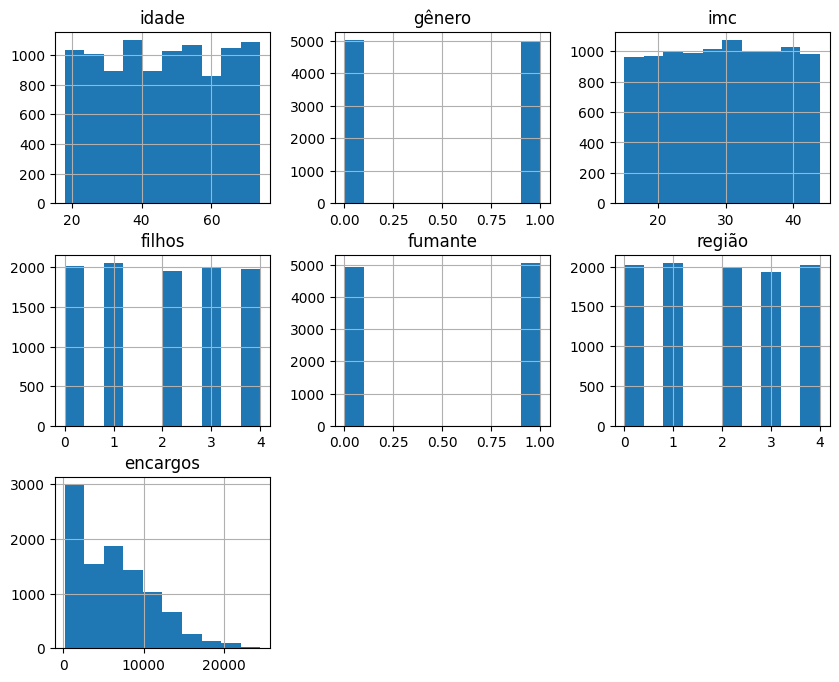

In [113]:

df.hist(figsize=(10,8))

Matriz de Correlaçao para verificar as correlaçoes entre as colunas

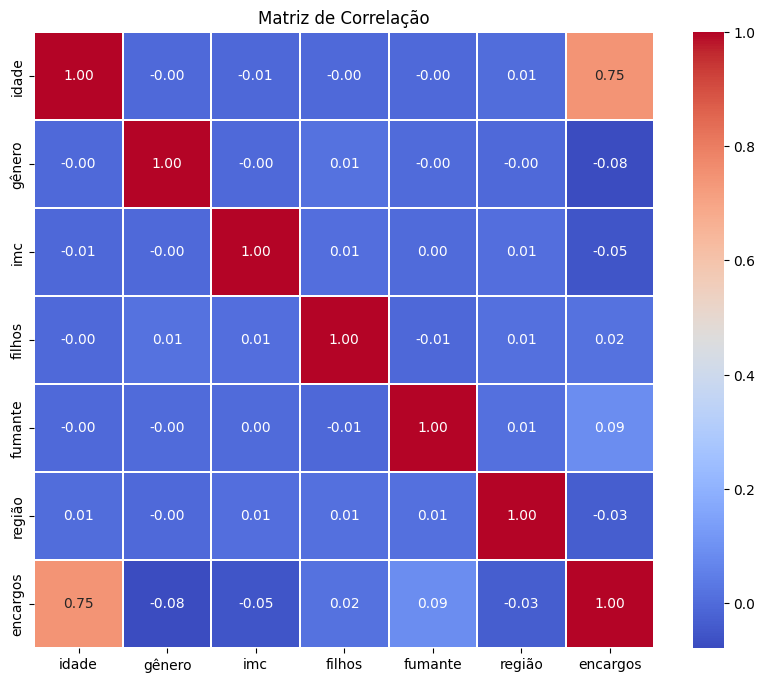

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualização da matriz de correlação

matriz_corr = df.corr()
matriz_corr


plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.2)
plt.title('Matriz de Correlação')
plt.show()

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='gênero', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>,
        <Axes: xlabel='filhos', ylabel='idade'>,
        <Axes: xlabel='fumante', ylabel='idade'>,
        <Axes: xlabel='região', ylabel='idade'>,
        <Axes: xlabel='encargos', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='gênero'>,
        <Axes: xlabel='gênero', ylabel='gênero'>,
        <Axes: xlabel='imc', ylabel='gênero'>,
        <Axes: xlabel='filhos', ylabel='gênero'>,
        <Axes: xlabel='fumante', ylabel='gênero'>,
        <Axes: xlabel='região', ylabel='gênero'>,
        <Axes: xlabel='encargos', ylabel='gênero'>],
       [<Axes: xlabel='idade', ylabel='imc'>,
        <Axes: xlabel='gênero', ylabel='imc'>,
        <Axes: xlabel='imc', ylabel='imc'>,
        <Axes: xlabel='filhos', ylabel='imc'>,
        <Axes: xlabel='fumante', ylabel='imc'>,
        <Axes: xlabel='região', ylabel='imc'>,
        <Axes: xlabel='encar

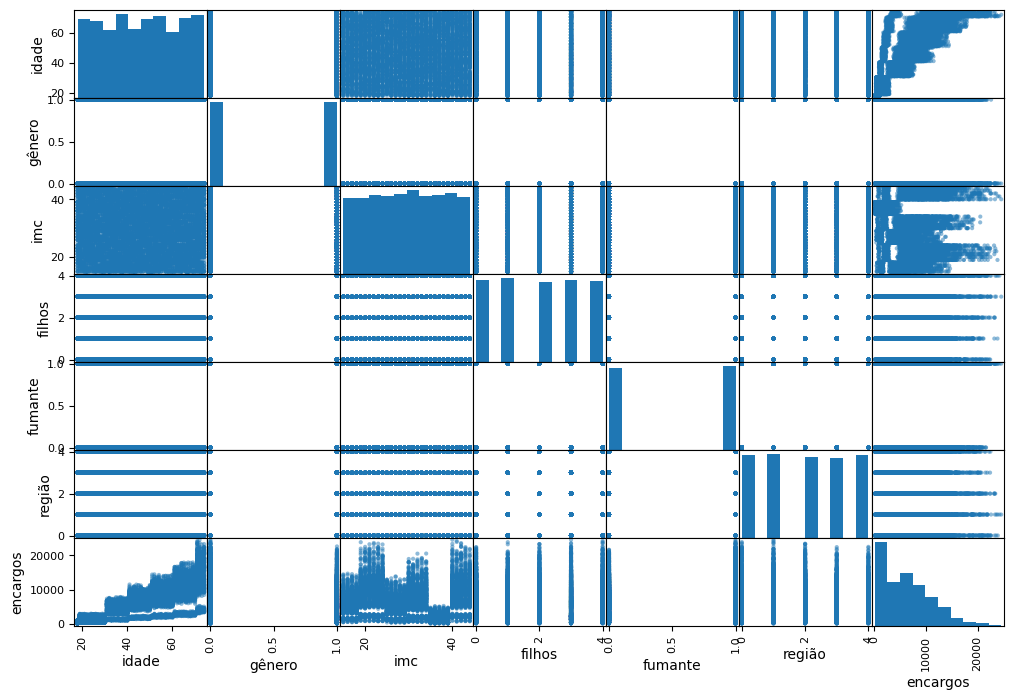

In [115]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(12, 8))

In [116]:
rotulos = df['encargos']
base    = df.drop('encargos', axis=1)

rotulos

0       11860.538380
1       15319.874793
2        8441.171330
3        6006.769689
4        6445.800156
            ...     
9995     5500.585749
9996    11815.567833
9997     6700.976529
9998     9248.530400
9999     5571.759947
Name: encargos, Length: 10000, dtype: float64

Limpando os dados

In [117]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(base, rotulos, test_size=0.2, random_state=42)



colunas= ['idade', 'gênero', 'imc', 'filhos', 'fumante', 'região']

scaler = MinMaxScaler()
scaler.fit(base)

pipeline = ColumnTransformer([
    ('valores nulos', SimpleImputer(strategy="median"), colunas),   
    ('padronizacao da escala', scaler, colunas)
])

"""
Limpando as bases e traino e testes separadamente para evitar vies
"""
X_train = pipeline.fit_transform(X_train)
X_test  = pipeline.fit_transform(X_test)



Definindo calculo de mape

In [118]:
import numpy as np
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

Definindo impressao da analise

In [119]:

# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
# Avaliando o desempenho do modelo
def imprimaAnalise(label, predict):
    erro_medio_quadratico = mean_squared_error(label, predict)
    erro_absoluto_medio = mean_absolute_error(label, predict)
    r_quadrado = r2_score(label, predict)
    mape = calculate_mape(label, predict)
    lin_mse = mean_squared_error(label, predict)
    lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
    lin_rmse

    print(f"Erro Médio Quadrático: {erro_medio_quadratico:.4f}")
    print(f"Erro Absoluto Médio: {erro_absoluto_medio:.4f}")
    print(f"R² (coeficiente de determinação): {r_quadrado:.4f}")

    print(f"O MAPE(média abs do percentual de erro ) é: {mape:.4f}%")
    print(f"O MSE (erro médio) é: {lin_rmse:.2f}")

    

    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(label)), label, color='blue', alpha=0.5, label='Valores reais')  # Pontos azuis para os valores reais
    plt.scatter(range(len(predict)), predict, color='red', alpha=0.5, label='Valores previstos')  # Pontos vermelhos para as previsões

    plt.title('Gráfico de dispersão entre valores reais e previstos com cores diferentes')
    plt.xlabel('Índice')
    plt.ylabel('Valores')
    plt.legend()  # Adiciona uma legenda para diferenciar
    plt.grid(True)
    plt.show()

Testando Regressao Linear

Regressao Linear
Erro Médio Quadrático: 9361569.6360
Erro Absoluto Médio: 2323.3079
R² (coeficiente de determinação): 0.5686
O MAPE(média abs do percentual de erro ) é: 61.6644%
O MSE (erro médio) é: 3059.67


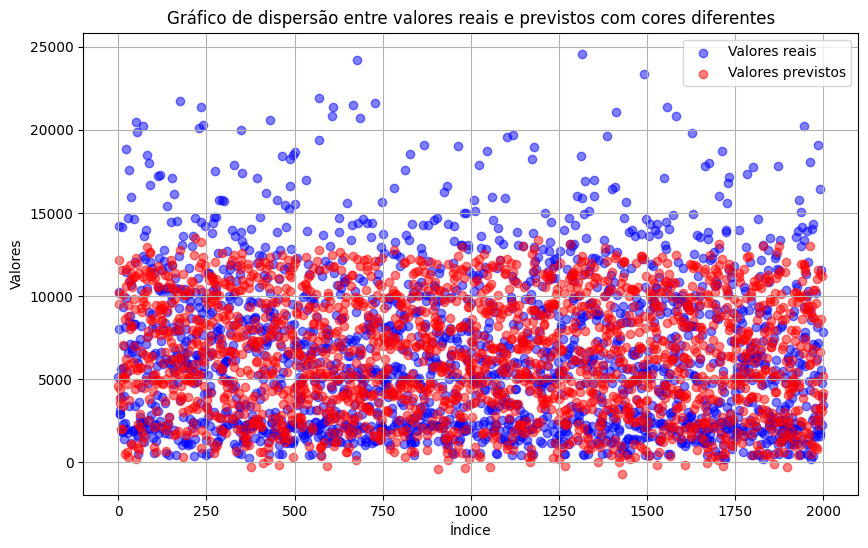

In [120]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)
previsoes = model.predict(X_test)
print("Regressao Linear")
imprimaAnalise(y_test, previsoes)


Testando arvore de decisao

Arvore de Decisao
Erro Médio Quadrático: 444943.5232
Erro Absoluto Médio: 442.3311
R² (coeficiente de determinação): 0.9795
O MAPE(média abs do percentual de erro ) é: 6.8212%
O MSE (erro médio) é: 667.04


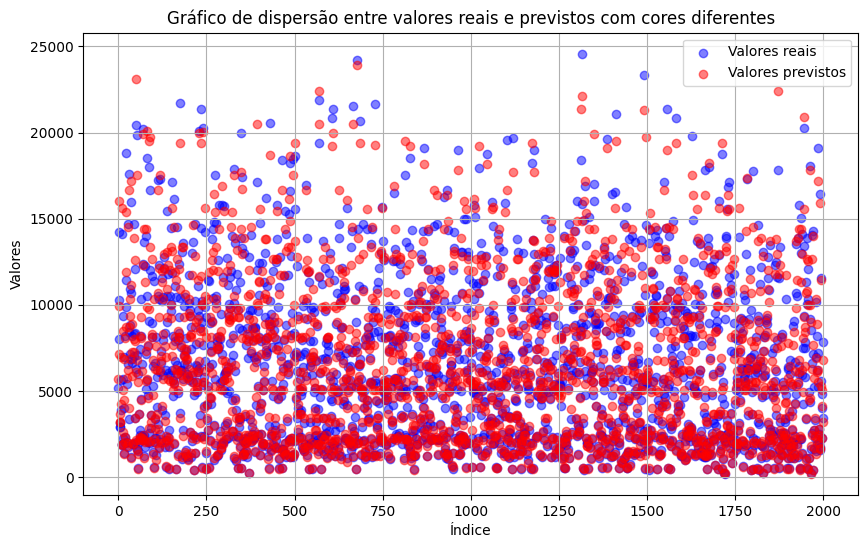

In [121]:
from sklearn.tree import DecisionTreeRegressor

model_tr = DecisionTreeRegressor(max_depth=10)
model_tr.fit(X_train, y_train)
previsoes_tr = model_tr.predict(X_test)
print("Arvore de Decisao")
imprimaAnalise(y_test, previsoes_tr)
